In [1]:
import os

import tensorflow.keras as keras
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Input, Activation, add, Add, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

from IPython.display import SVG
from tensorflow.python.keras.utils.vis_utils import model_to_dot

random_state = 42

# Data Augmentation(データの水増し)

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.astype('float32') / 255
y_train = np.eye(10)[y_train.astype('int32').flatten()]

x_test = x_test.astype('float32') / 255
y_test = np.eye(10)[y_test.astype('int32').flatten()]

x_train, x_valid, y_train, y_valid = train_test_split(
    x_train, y_train, test_size=10000)

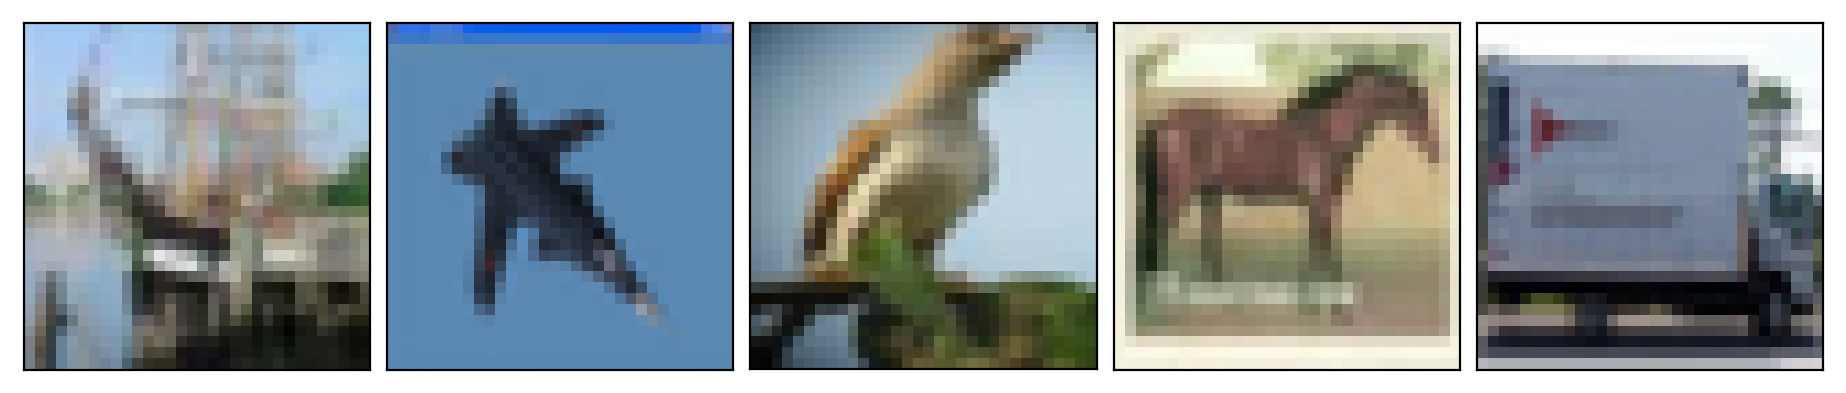

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

fig = plt.figure(figsize=(9, 15))
fig.subplots_adjust(left=0, right=1, bottom=0,
                    top=0.5, hspace=0.05, wspace=0.05)

for i in range(5):
    ax = fig.add_subplot(1, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(x_train[i])

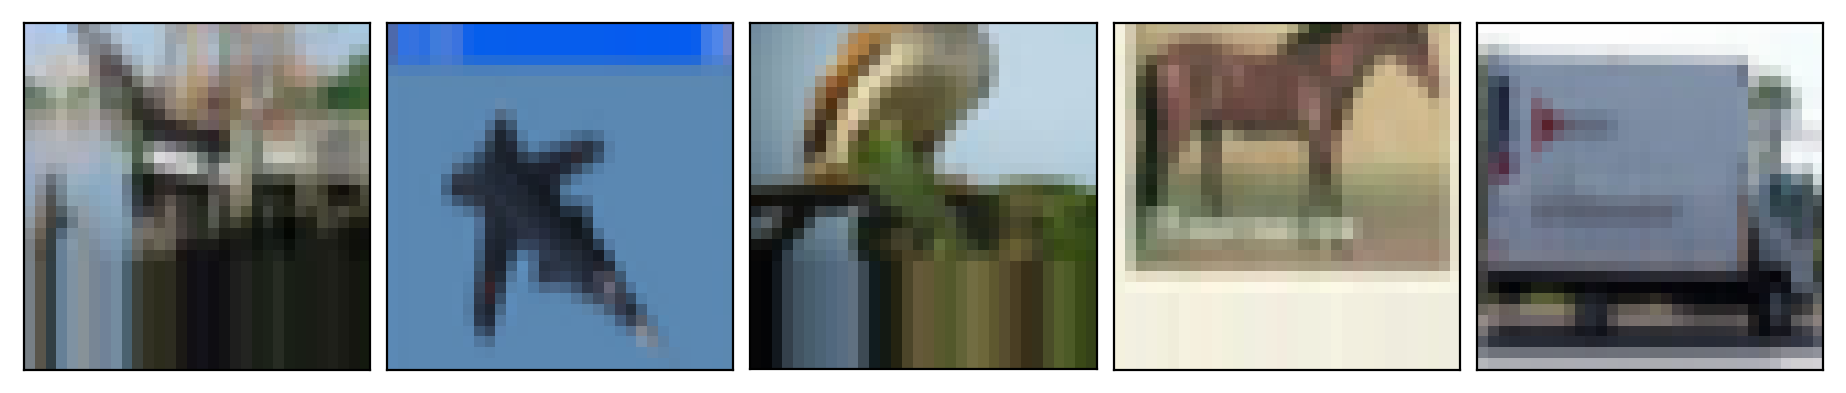

In [4]:
# 上下にずらす
datagen = ImageDataGenerator(height_shift_range=0.4)

datagen.fit(x_train)

fig = plt.figure(figsize=(9, 15))
fig.subplots_adjust(left=0, right=1, bottom=0,
                    top=0.5, hspace=0.05, wspace=0.05)

for x_batch, y_batch in datagen.flow(x_train, y_train, batch_size=9, shuffle=False):
    for i in range(5):
        ax = fig.add_subplot(1, 5, i + 1, xticks=[], yticks=[])
        ax.imshow(x_batch[i])
    break

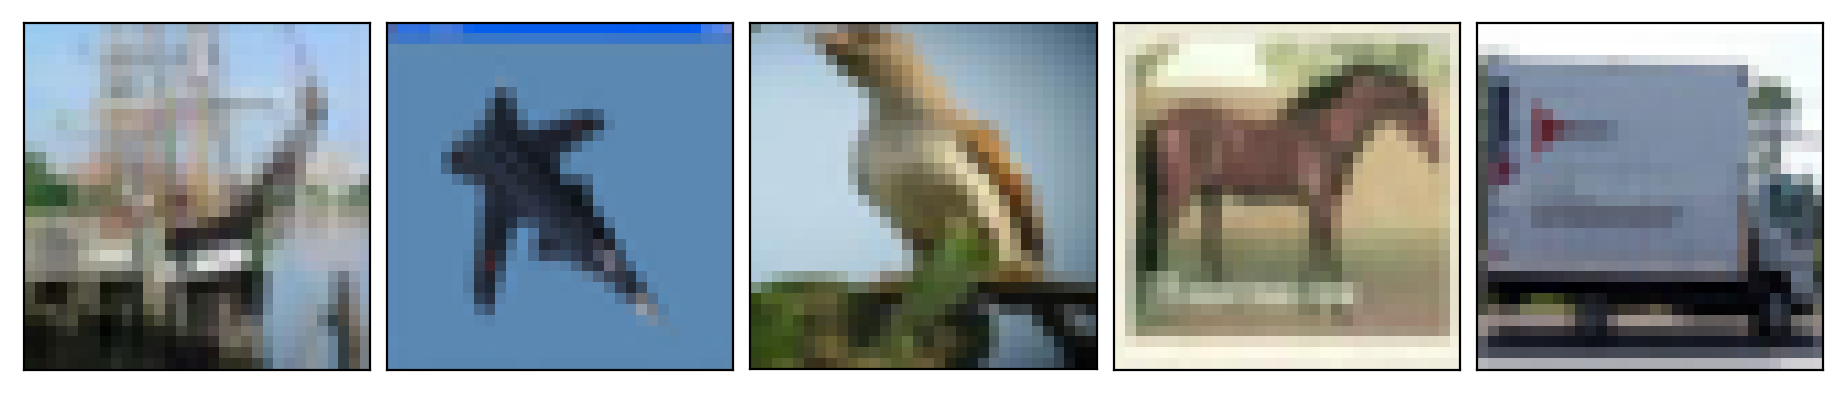

In [5]:
# 左右反転
datagen = ImageDataGenerator(horizontal_flip=True)

datagen.fit(x_train)

fig = plt.figure(figsize=(9, 15))
fig.subplots_adjust(left=0, right=1, bottom=0,
                    top=0.5, hspace=0.05, wspace=0.05)

for x_batch, y_batch in datagen.flow(x_train, y_train, batch_size=9, shuffle=False):
    for i in range(5):
        ax = fig.add_subplot(1, 5, i + 1, xticks=[], yticks=[])
        ax.imshow(x_batch[i])
    break

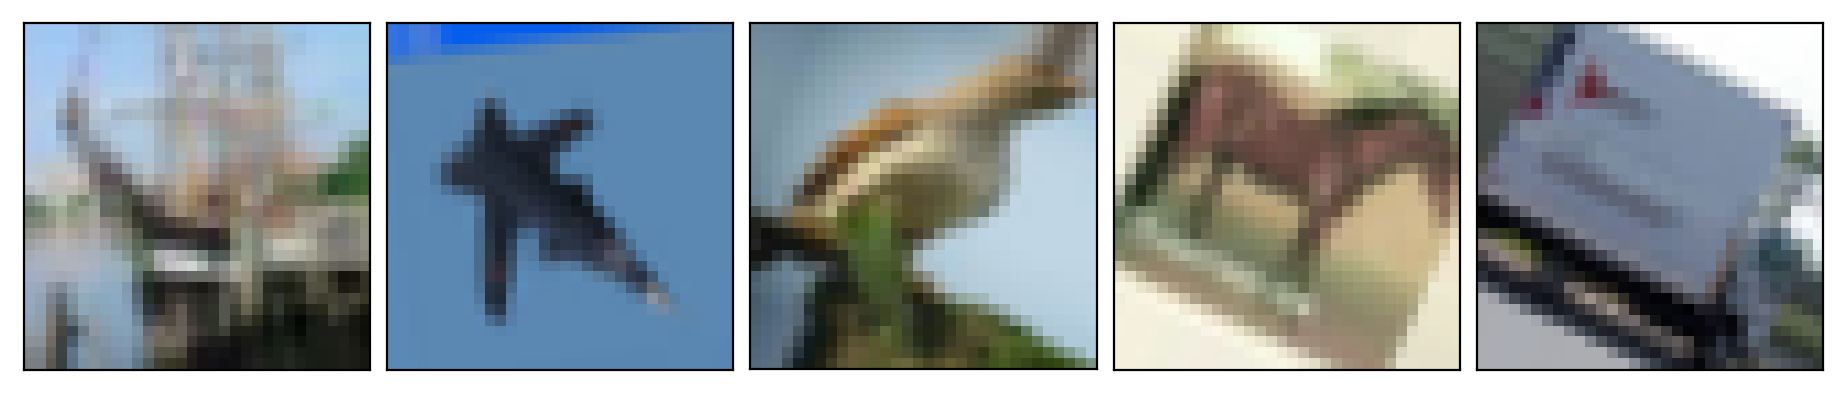

In [10]:
# 回転
datagen = ImageDataGenerator(rotation_range=30)

datagen.fit(x_train)

fig = plt.figure(figsize=(9, 15))
fig.subplots_adjust(left=0, right=1, bottom=0,
                    top=0.5, hspace=0.05, wspace=0.05)

for x_batch, y_batch in datagen.flow(x_train, y_train, batch_size=9, shuffle=False):
    for i in range(5):
        ax = fig.add_subplot(1, 5, i + 1, xticks=[], yticks=[])
        ax.imshow(x_batch[i])
    break

cf. Keras ImageDataGenerator: https://keras.io/preprocessing/image/

# 画像データの正規化

## Global Contrast Normalization (GCN)

In [11]:
# 可視化用に値のrangeを[0, 1]に修正
def normalize(x):
    max_x = np.max(x, axis=(0, 1), keepdims=True)
    min_x = np.min(x, axis=(0, 1), keepdims=True)
    return (x - min_x) / (max_x - min_x)

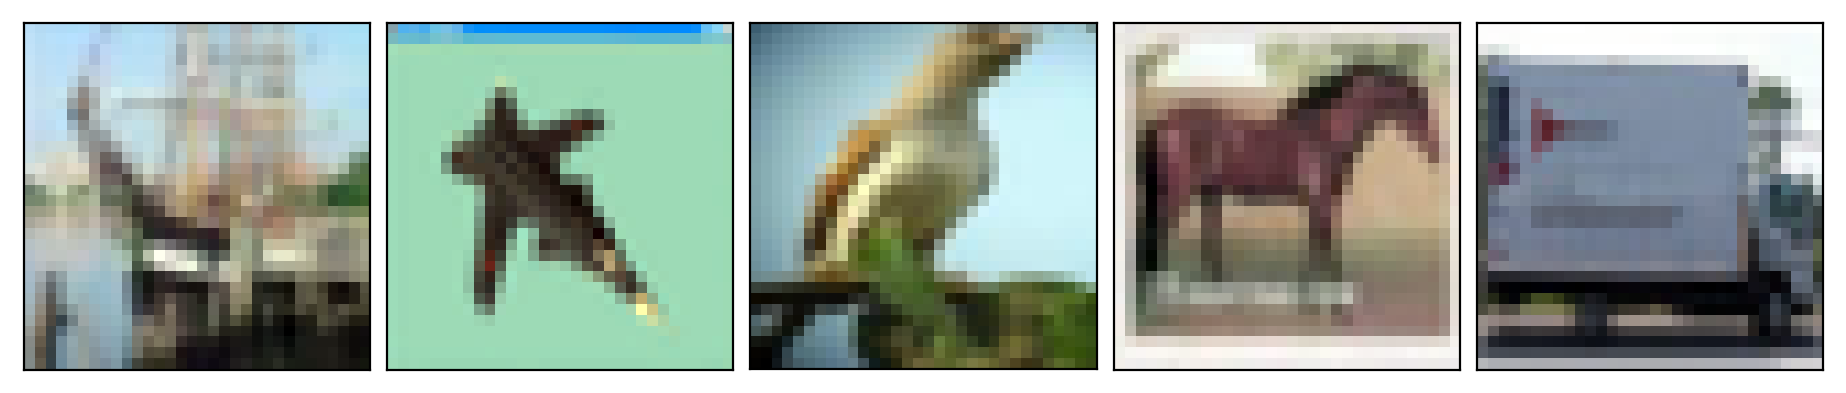

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

gcn_whitening = ImageDataGenerator(samplewise_center=True, samplewise_std_normalization=True)

gcn_whitening.fit(x_train)

fig = plt.figure(figsize=(9, 15))
fig.subplots_adjust(left=0, right=1, bottom=0, top=0.5, hspace=0.05, wspace=0.05)

for x_batch, y_batch in gcn_whitening.flow(x_train, y_train, batch_size=9, shuffle=False):
    for i in range(5):
        ax = fig.add_subplot(1, 5, i+1, xticks=[], yticks=[])
        ax.imshow(normalize(x_batch[i]))
    break

## Zero-phase Component Analysis (ZCA) Whitening

入力の各要素間の相関をゼロ(白色化)にします。

PCAを利用して共分散行列を単位行列化 (分散1、共分散0) したのち、元の空間に戻します。

TODO: 要勉強

/opt/conda/lib/python3.7/site-packages/keras_preprocessing/image/image_data_generator.py:334: UserWarning: This ImageDataGenerator specifies `zca_whitening`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


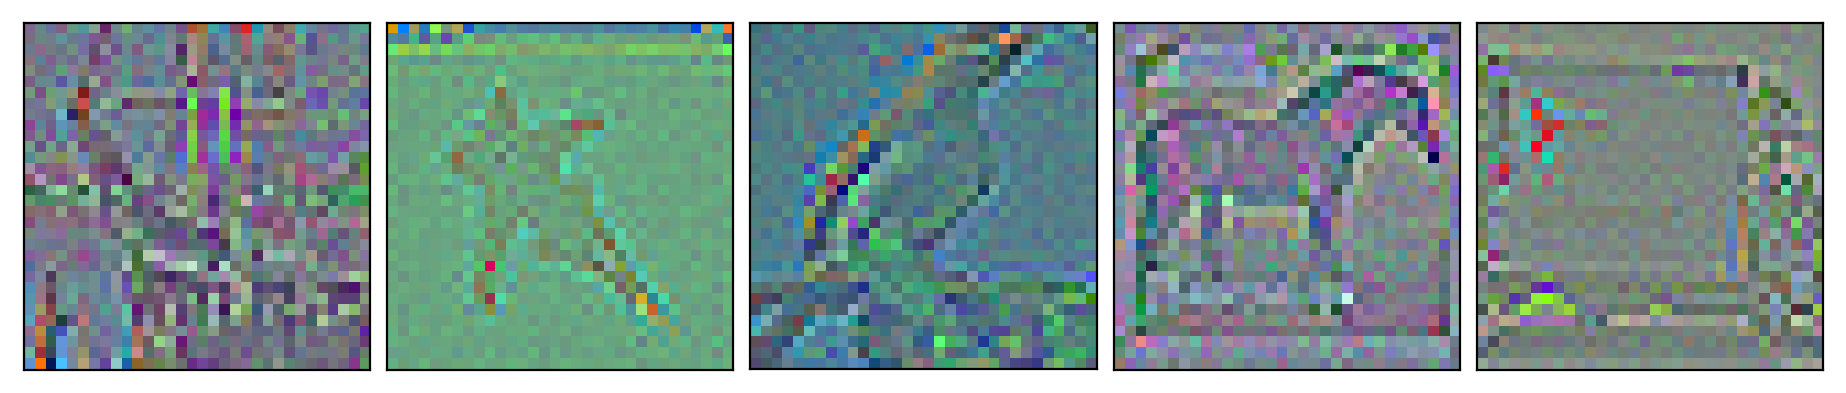

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

zca_whitening = ImageDataGenerator(zca_whitening=True)

zca_whitening.fit(x_train)

fig = plt.figure(figsize=(9, 15))
fig.subplots_adjust(left=0, right=1, bottom=0,
                    top=0.5, hspace=0.05, wspace=0.05)

for x_batch, y_batch in zca_whitening.flow(x_train, y_train, batch_size=9, shuffle=False):
    for i in range(5):
        ax = fig.add_subplot(1, 5, i + 1, xticks=[], yticks=[])
        ax.imshow(normalize(x_batch[i]))
    break

# 確認問題

- 問1. ②
- 問2. ~~②~~①
- 問3. ①
- 問4. ①